## Постановка задачи:
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

# 0. Анализ увольнения сотрудников
Была получена база данных сотрудников компании. На основе полученных данных нужно выявить, какие сотрудники с большей вероятностью покинут рабочее место.

In [26]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn

# 1. Считывание данных

In [2]:
data = pd.read_csv('C:/Users/sadpo/Documents/ПМИ материалы/Machine Learning/archive/whole_data.csv')
data

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [3]:
info = pd.read_excel('C:/Users/sadpo/Documents/ПМИ материалы/Machine Learning/archive/data_dictionary.xlsx')
info

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


### Имеем 29 признаков
0. Age	- Возраст сотрудника
1. Attrition - Ушел ли сотрудник из компании в прошлом году
2. BusinessTravel	- Как часто сотрудник уезжал в командировки в прошлом году
3. Department - Отдел в компании
4. DistanceFromHome	- Расстояние от дома до работы в км
5. Education - Образование    
    1 - Среднее общее образование    
    2 - Колледж    
    3 - Бакалавриат    
    4 - Магистратура  
    5 - Доктор наук
6.	EducationField	- Специализация
7.	EmployeeCount - Количество сотрудников
8.	EmployeeID	- ID сотрудника
9.	EnvironmentSatisfaction	- Уровень удовлетворенности рабочей средой	  
    1 - Низкий    
    2 - средний   
    3 - Высокий    
    4 - Очень высокий
10.	Gender - Пол сотрудника
11.	JobInvolvement - Уровень вовлеченности в работу	   
    1 - Низкий   
    2 - Средний   
    3 - Высокий   
    4 - Очень высокий
12.	JobLevel - Уровень работы в компании по шкале от 1 до 5
13.	JobRole	- Название должности в компании
14.	JobSatisfaction	- Уровень удовлетворенноси работой   
    1 - Низкий   
    2 - Средний   
    3 - Высокий   
    4 - Очень высокий   
15.	MaritalStatus - Семейное положение
16.	MonthlyIncome - Ежемесячный доход в рупиях
17.	NumCompaniesWorked - Общее число компаний, в которых проработал сотрудник
18.	Over18 - Старше ли 18-ти
19.	PercentSalaryHike - Повышение зарплаты в процентах за прошлый год
20.	PerformanceRating - Уровень эффективности сотрудника	 
    1 - Низкий   
    2 - Хороший   
    3 - Отличный   
    4 - Выдающийся    
21.	StandardHours - Стандартное количество рабочих часов
22.	StockOptionLevel - Фондовый опцион
23.	TotalWorkingYears - Всего проработанных лет
24.	TrainingTimesLastYear - Количество тренингов, проведенных для сотрудника
25.	WorkLifeBalance - Уровень сбалансированности работы и жизни    
    1 - Плохой    
    2 - Хороший    
    3 - Лучший    
    4 - Наилучший    
26.	YearsAtCompany - Всего проработанных лет в компании
27.	YearsSinceLastPromotion - Лет с прошого повышения
28.	YearsWithCurrManager - Лет под руководством текущего менеджера

# 2. Визуализация данных

Вычислим основыные статистические характеристики

In [4]:
data_1 = data.loc[:,['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 
                     'Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 
                     'EmployeeCount', 'Gender', 'JobLevel']]
des = data_1.describe(include='all')
des

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel
count,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410,4410.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3,NaN,NaN,6,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3699,3129,2883,NaN,NaN,1818,NaN,2646,NaN
mean,2.729932,3.153741,2.723603,2.728246,2.761436,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,NaN,2.063946
std,0.711400,0.360742,1.092756,1.101253,0.706245,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,NaN,1.106689
min,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,NaN,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,NaN,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,NaN,2.000000
75%,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,NaN,3.000000


In [5]:
data_2 = data.loc[:,['JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 
                     'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                     'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
des = data_2.describe(include='all')
des

,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410,4410,4410.000000,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
unique,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,65029.312925,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,NaN,NaN,47068.888559,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,NaN,NaN,10090.000000,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,29110.000000,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,NaN,NaN,49190.000000,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,NaN,NaN,83800.000000,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000


DistanceFromHome, Age, MonthlyIncome, YearsSinceLastPromotion - подозрительные на выбросы.

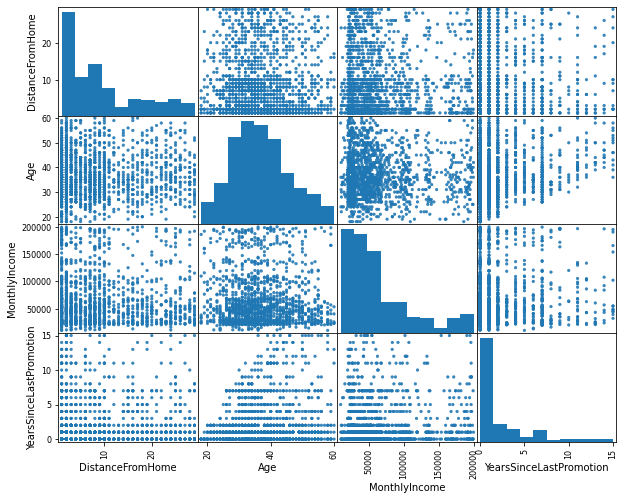

In [6]:
data_3 = data.loc[:,['DistanceFromHome', 'Age', 'MonthlyIncome', 'YearsSinceLastPromotion']]
pd.plotting.scatter_matrix(data_3, figsize = (10, 8))
pass

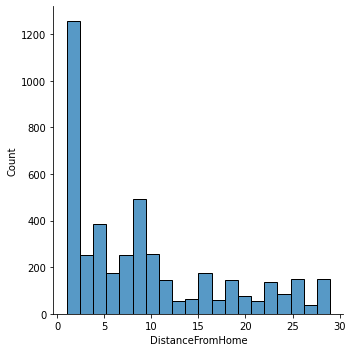

In [7]:
sns.displot(data['DistanceFromHome'])

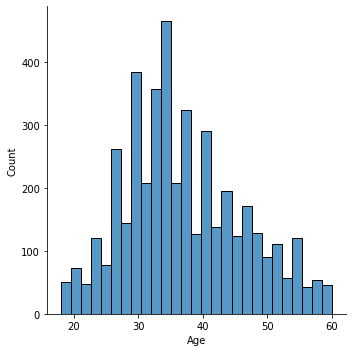

In [8]:
sns.displot(data['Age'])

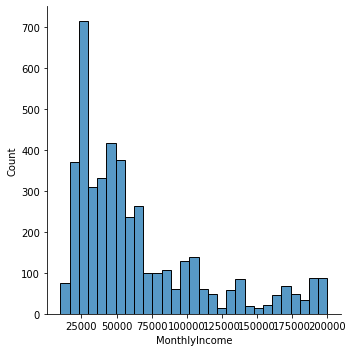

In [9]:
sns.displot(data['MonthlyIncome'])

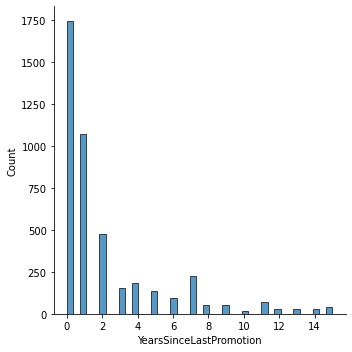

In [10]:
sns.displot(data['YearsSinceLastPromotion'])

In [11]:
col_num = data.select_dtypes(include=np.number).columns

for col in col_num:
    Q1, Q3 = data[col].quantile([.25, .75])
    IQR = Q3 - Q1
    price_lower = Q1 - 1.5*IQR
    price_upper = Q3 + 1.5*IQR
    pct_outlier = len(data[(data[col] < price_lower) | (data[col] > price_upper)].index)*100/50000
    print('{} - {}%'.format(col, round(pct_outlier,3)))

EmployeeID - 0.0%
JobInvolvement - 0.0%
PerformanceRating - 1.356%
EnvironmentSatisfaction - 0.0%
JobSatisfaction - 0.0%
WorkLifeBalance - 0.0%
Age - 0.0%
DistanceFromHome - 0.0%
Education - 0.0%
EmployeeCount - 0.0%
JobLevel - 0.0%
MonthlyIncome - 0.684%
NumCompaniesWorked - 0.312%
PercentSalaryHike - 0.0%
StandardHours - 0.0%
StockOptionLevel - 0.51%
TotalWorkingYears - 0.378%
TrainingTimesLastYear - 1.428%
YearsAtCompany - 0.624%
YearsSinceLastPromotion - 0.642%
YearsWithCurrManager - 0.084%


C:\Users\sadpo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\sadpo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 8.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\sadpo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\sadpo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results i

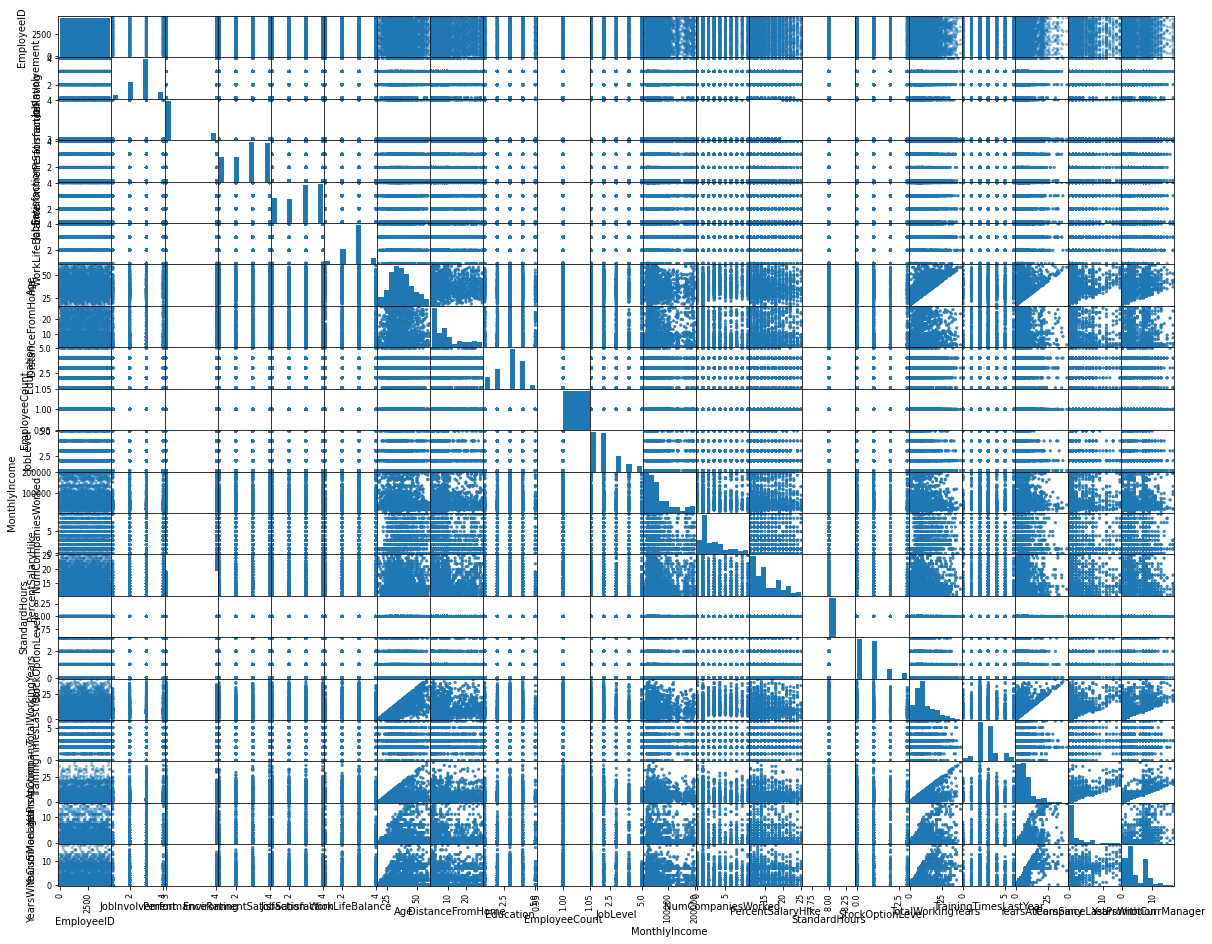

In [12]:
pd.plotting.scatter_matrix(data, figsize = (20, 16))
pass

Корреляционная матрица для числовых значений

<AxesSubplot:>

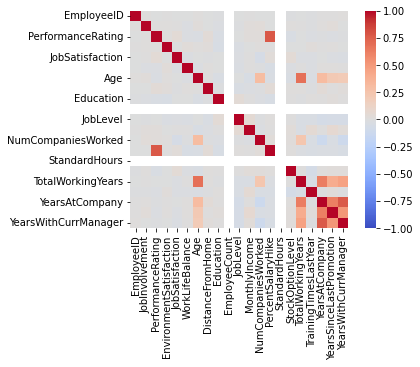

In [13]:
corr_matr = data.corr()
sns.heatmap(corr_matr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

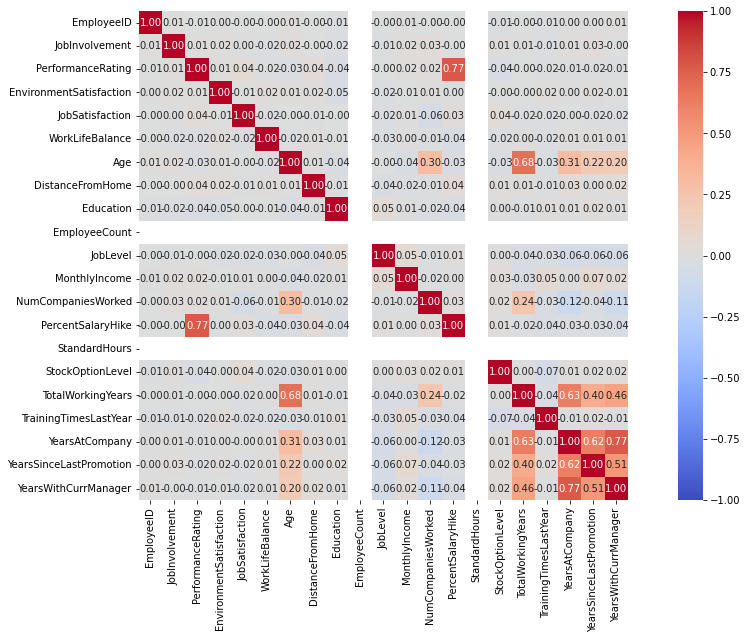

In [14]:
plt.figure(figsize = (18,9))
sns.heatmap(corr_matr, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [15]:
corr_matr > 0.5

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JobInvolvement,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PerformanceRating,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
EnvironmentSatisfaction,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JobSatisfaction,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WorkLifeBalance,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
DistanceFromHome,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Education,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
EmployeeCount,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Коррелируют следующие признаки:
PercentSalaryHike & PerformanceRating - Сотруднику дают прибавку к зарплате, если он эффективно справляется с работой
Age & TotalWorkingYears
YearsAtCompany & TotalWorkingYears
YearsAtCompany & YearsSinceLastPromotion
YearsAtCompany & YearsWithCurrManager
YearsSinceLastPromotion & YearsWithCurrManager
Эти пять пар признаков коррелируют друг с другом, поскольку все связаны с возрастом и опытом работы.

# 3. Пропущенные значения

In [16]:
data.isnull().sum()

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, NumCompaniesWorked, TotalWorkingYears - признаки с пропущенными значениями.
Заменим пропущенные значения для числовых признаков - медианами.

In [17]:
feat = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'TotalWorkingYears']
data[feat].median(axis = 0)

EnvironmentSatisfaction     3.0
JobSatisfaction             3.0
WorkLifeBalance             3.0
NumCompaniesWorked          2.0
TotalWorkingYears          10.0
dtype: float64

In [18]:
data[feat] = data[feat].fillna(data[feat].median(axis = 0), axis=0)
data.isnull().sum() 

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Пропущенные значения обработаны

# 4. Обработка категориальных признаков

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

Бинарные признаки Attrition, Over18 заменим на числовой (0 и 1).    
К небинарным признакам: 

BusinessTravel - Как часто сотрудник уезжал в командировки в прошлом году   
Department - Отдел в компании   
EducationField - Специализация   
Gender - Пол сотрудника   
JobRole - Название должности в компании   
MaritalStatus - Семейное положение   

применим метод бинаризации (one-hot encoding).

In [19]:
data['Attrition'] = pd.factorize(data['Attrition'])[0]
data['Over18'] = pd.factorize(data['Over18'])[0]

BusinessTravel_dummies = pd.get_dummies(data['BusinessTravel'])
Department_dummies = pd.get_dummies(data['Department'])
EducationField_dummies = pd.get_dummies(data['EducationField'])
Gender_dummies = pd.get_dummies(data['Gender'])
JobRole_dummies = pd.get_dummies(data['JobRole'])
MaritalStatus_dummies = pd.get_dummies(data['MaritalStatus'])

data.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,1.0,0,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,0.0,0,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,1.0,0,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,3.0,0,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,4.0,0,12,8,2,9.0,2,6,0,4


Добавим dummy-столбцы к таблице и удалим категориальные.

In [20]:
data = pd.concat((data, BusinessTravel_dummies), axis=1)
data = pd.concat((data, Department_dummies), axis=1)
data = pd.concat((data, EducationField_dummies), axis=1)
data = pd.concat((data, Gender_dummies), axis=1)
data = pd.concat((data, JobRole_dummies), axis=1)
data = pd.concat((data, MaritalStatus_dummies), axis=1)

data = data.drop(['BusinessTravel'], axis=1)
data = data.drop(['Department'], axis=1)
data = data.drop(['EducationField'], axis=1)
data = data.drop(['Gender'], axis=1)
data = data.drop(['JobRole'], axis=1)
data = data.drop(['MaritalStatus'], axis=1)

data.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,1,3,3,3.0,4.0,2.0,51,0,6,2,...,0,0,0,0,0,0,0,0,1,0
1,2,2,4,3.0,2.0,4.0,31,1,10,1,...,0,0,0,0,1,0,0,0,0,1
2,3,3,3,2.0,2.0,1.0,32,0,17,4,...,0,0,0,0,0,1,0,0,1,0
3,4,2,3,4.0,4.0,3.0,38,0,2,5,...,0,0,0,0,0,0,0,0,1,0
4,5,3,3,4.0,1.0,3.0,32,0,10,1,...,0,0,0,0,0,1,0,0,0,1


# 5. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. 

Выполним стандартизацию всех признаков.

In [21]:
data_st = (data - data.mean(axis = 0))/data.std(axis = 0)
data_st.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,-1.731462,0.379629,-0.426182,0.252172,1.156171,-1.085213,1.541194,-0.438373,-0.393894,-0.891587,...,-0.462411,-0.273028,-0.330771,-0.239877,-0.497817,-0.533761,-0.244597,-0.534812,1.088109,-0.685488
1,-1.730676,-1.026050,2.345885,0.252172,-0.663823,1.757549,-0.648595,2.280647,0.099627,-1.868214,...,-0.462411,-0.273028,-0.330771,-0.239877,2.008316,-0.533761,-0.244597,-0.534812,-0.918817,1.458485
2,-1.729891,0.379629,-0.426182,-0.665384,-0.663823,-2.506595,-0.539105,-0.438373,0.963289,1.061666,...,-0.462411,-0.273028,-0.330771,-0.239877,-0.497817,1.873074,-0.244597,-0.534812,1.088109,-0.685488
3,-1.729105,-1.026050,-0.426182,1.169728,1.156171,0.336168,0.117831,-0.438373,-0.887414,2.038293,...,-0.462411,-0.273028,-0.330771,-0.239877,-0.497817,-0.533761,-0.244597,-0.534812,1.088109,-0.685488
4,-1.728320,0.379629,-0.426182,1.169728,-1.573821,0.336168,-0.539105,-0.438373,0.099627,-1.868214,...,-0.462411,-0.273028,-0.330771,-0.239877,-0.497817,1.873074,-0.244597,-0.534812,-0.918817,1.458485


# 6. Разбить данные на обучающую и тестовые выборки

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis = 1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 7. Классификатор ближайших соседей

In [77]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = [3, 5, 7, 10, 12, 15, 18, 20]
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict)

(0.13945578231292516, 0.19727891156462585)

In [80]:
errs_train = []
errs_test = []
for i in neighbours:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))

In [81]:
mat = pd.DataFrame([errs_train, errs_test], columns = neighbours)
mat

,3,5,7,10,12,15,18,20
0,0.139456,0.152211,0.160147,0.162132,0.162698,0.164116,0.164683,0.164683
1,0.197279,0.171202,0.164399,0.143991,0.145125,0.146259,0.147392,0.147392


# 8. Вычисление  ошибок

Исходя из результатов, выведенных выше, ошибка на тестовой выборке всегда немного больше.

# 9. Другие классификаторы

Градиентный бустинг:

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators = 1000)
model.fit(X_train, y_train)

print(np.mean(y_train != model.predict(X_train)), np.mean(y_test != model.predict(X_test)))

0.0 0.024943310657596373


In [67]:
ests = [100, 200, 300, 500, 600, 800, 900, 1000]
errs_train = []
errs_test = []
for i in ests:    
    model = GradientBoostingClassifier(n_estimators = i)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
mat = pd.DataFrame([errs_train, errs_test], columns = ests)
mat

,100,200,300,500,600,800,900,1000
0,0.089853,0.051020,0.028912,0.010771,0.005102,0.000567,0.000000,0.000000
1,0.109977,0.081633,0.072562,0.049887,0.043084,0.031746,0.026077,0.024943


Случайный лес:

In [75]:
from sklearn.ensemble import RandomForestClassifier

errs_train = []
errs_test = []
for i in ests:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
mat = pd.DataFrame([errs_train, errs_test], columns = ests)
mat

,100,200,300,500,600,800,900,1000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.018141,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873,0.015873


# 10. Общие выводы

Самый лучший, но медленный реузьтат показал RandomForestClassifier.   
Самый быстрый - KNeighborsClassifier.   
GradientBoostingClassifier показал средний результат при очень медленной работе.   